In [1]:
# allows to import own functions
import sys, os, re
root_project = re.findall(r'(^\S*TFM-master)', os.getcwd())[0]
sys.path.append(root_project)

from src.utils.help_func import results_searchcv, make_train_val_test, errors_distribution
from src.features.add_features import features_graph, features_pop

In [9]:
from sklearn.svm import LinearSVR, SVR
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, expon, randint, loguniform
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(f'{root_project}/data/processed/simulation_results.csv')
df = features_graph(df)
df = features_pop(df)
df

,i_country,R0,Tc,Tr,omega,inf_pow_1,inf_pow_2,mort_pow_1,mort_pow_2,mort_pow_3,limit_deaths,n_closed,react_time,total_infected,total_death,total_removed,betweenness,degree,closeness,country_pop
0,LBN,9.490802,2.214174,21.014286,0.069029,2.918571e+03,1.140780e+02,0.007146,0.005701,0.048225,72,6,23,7.509688e+09,5.191675e+08,7.521476e+09,0.001057,0.270270,0.460581,6848925.0
1,KIR,3.161672,6.111805,19.323523,0.012080,1.265010e+05,2.916422e+02,0.003715,0.002368,0.007072,872,2,2,7.166248e+09,8.694994e+07,7.201020e+09,0.000956,0.036036,0.391534,115847.0
2,MOZ,16.439975,1.263448,20.771054,0.046275,8.045407e+04,2.297547e+03,0.002847,0.001771,0.026642,192,0,22,7.530737e+09,3.532065e+08,7.633573e+09,0.000059,0.054054,0.382759,29495962.0
3,ERI,2.141326,1.149404,2.461249,0.014779,5.593643e+03,1.969175e+02,0.006883,0.009034,0.010026,511,9,28,6.401541e+09,9.461014e+07,6.402090e+09,0.000007,0.049550,0.368159,3213972.0
4,VCT,9.327237,1.192357,11.121400,0.058201,9.880857e+03,2.862489e+02,0.013316,0.013809,0.044225,958,18,20,7.477989e+09,4.352523e+08,7.478614e+09,0.000035,0.040541,0.312236,110210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146879,KAZ,11.763182,1.447605,17.028439,0.278547,6.074571e+03,9.460448e+02,0.023576,0.015816,0.169786,76,15,29,7.504537e+09,2.090856e+09,7.506367e+09,0.000831,0.216216,0.449393,18276499.0
146880,ITA,10.734467,0.201486,2.162848,0.029374,2.984051e+08,3.300158e+06,0.009123,0.012621,0.014495,434,12,21,7.512071e+09,2.206617e+08,7.512265e+09,0.017998,0.707207,0.572165,60431283.0
146881,ARM,19.957722,0.655780,13.087873,0.078398,2.532314e+05,6.713776e+03,0.016655,0.016688,0.061060,788,3,14,7.535460e+09,5.919213e+08,7.550623e+09,0.000054,0.117117,0.424474,2951776.0
146882,AZE,13.648353,0.278279,3.798044,0.093562,2.234922e+07,1.928435e+06,0.010039,0.004640,0.029322,314,0,12,7.552275e+09,7.113103e+08,7.602798e+09,0.000554,0.198198,0.449393,9942334.0


In [4]:
df = df.sample(20000) # par entrenar con menos muestras

features = ['Tr', 'inf_pow_1', 'inf_pow_2', 'mort_pow_1', 'mort_pow_2', 'mort_pow_3', 'limit_deaths',
           'n_closed', 'react_time','total_death', 'betweenness', 'degree', 'closeness', 'country_pop']


df = df[features]

display(df)

X_train_val, y_train_val, X_test, y_test = make_train_val_test(df, out_mode=1)

# num_columns = X_train_val.columns

# scaler = StandardScaler()
# X_train_val_scaled = scaler.fit_transform(X_train_val[num_columns].astype(np.float64))
# X_test_scaled = scaler.transform(X_test[num_columns].astype(np.float64))

,Tr,inf_pow_1,inf_pow_2,mort_pow_1,mort_pow_2,mort_pow_3,limit_deaths,n_closed,react_time,total_death,betweenness,degree,closeness,country_pop
42939,7.904412,2.505444e+05,16126.559375,0.007977,0.005422,0.034365,414,18,6,2.791542e+08,0.003726,0.238739,0.478448,10627165.0
35742,17.349458,1.646896e+05,27043.638554,0.014798,0.007600,0.139757,825,5,27,2.175905e+09,0.020523,0.414414,0.524823,109224559.0
138274,9.412631,1.376217e+07,366162.604124,0.009413,0.010212,0.051975,448,13,20,8.447165e+08,0.001410,0.211712,0.487912,212215030.0
66852,21.628709,1.361423e+05,8809.906166,0.005799,0.003364,0.062127,160,0,14,8.976570e+08,0.006495,0.220721,0.483660,15854360.0
76150,15.509990,3.854107e+04,352.909156,0.003705,0.004084,0.016903,105,7,10,1.716746e+08,0.000262,0.238739,0.459627,483530.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32010,15.277222,1.371429e+03,33.603333,0.006302,0.006001,0.026431,503,10,1,2.710957e+08,0.000000,0.009009,0.382100,33701.0
101015,20.086183,2.873571e+02,44.339806,0.034551,0.030436,0.191724,317,0,11,2.008759e+09,0.000000,0.027027,0.359223,1267972.0
59148,5.215670,6.444286e+02,120.930233,0.083241,0.144423,0.158339,245,6,5,1.119695e+09,0.000000,0.009009,0.296395,11646.0
64003,10.767909,3.769483e+05,6361.778369,0.012906,0.018983,0.038886,946,3,13,3.712368e+08,0.000245,0.099099,0.422053,5244363.0


Train_validation set: (16000, 13)
Test set: (4000, 13)


In [5]:
# svm_pipe = Pipeline([
#     ('preprocess', StandardScaler()),
#     ('estimator', LinearSVR(random_state=42))
# ])

# param_dist = dict(
#     estimator__C=loguniform(0.001, 1000),
#     estimator__dual=[True, False],
# )


# random_search = RandomizedSearchCV(svm_pipe, param_distributions=param_dist, verbose=2,
#                           n_iter=500, random_state=42, n_jobs=-1)

# random_search.fit(X_train_val, y_train_val)

# results_searchcv(random_search, X_test, y_test)

In [11]:
svr_pipe = Pipeline([
    ('preprocess', StandardScaler()),
    ('estimator', SVR())
])

param_dist = dict(
    estimator__kernel = ['rbf'],
    estimator__C= loguniform(700, 1200),
    estimator__gamma= loguniform(1e-8, 1e-1)
)


random_search = RandomizedSearchCV(svr_pipe, param_distributions=param_dist, verbose=2, cv=3,
                          n_iter=50, random_state=42, n_jobs=-1)

random_search.fit(X_train_val, y_train_val)

results_searchcv(random_search, X_test, y_test)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.3min finished


Best score:
-0.09266850473176606
Best parameters found:
{'estimator__C': 966.1763083808736, 'estimator__gamma': 0.028387009634436258, 'estimator__kernel': 'rbf'}
Score in test:
-0.08056313130708959
R^2 in test
-0.08056313130708959
MAE in test:
469479465.9834603


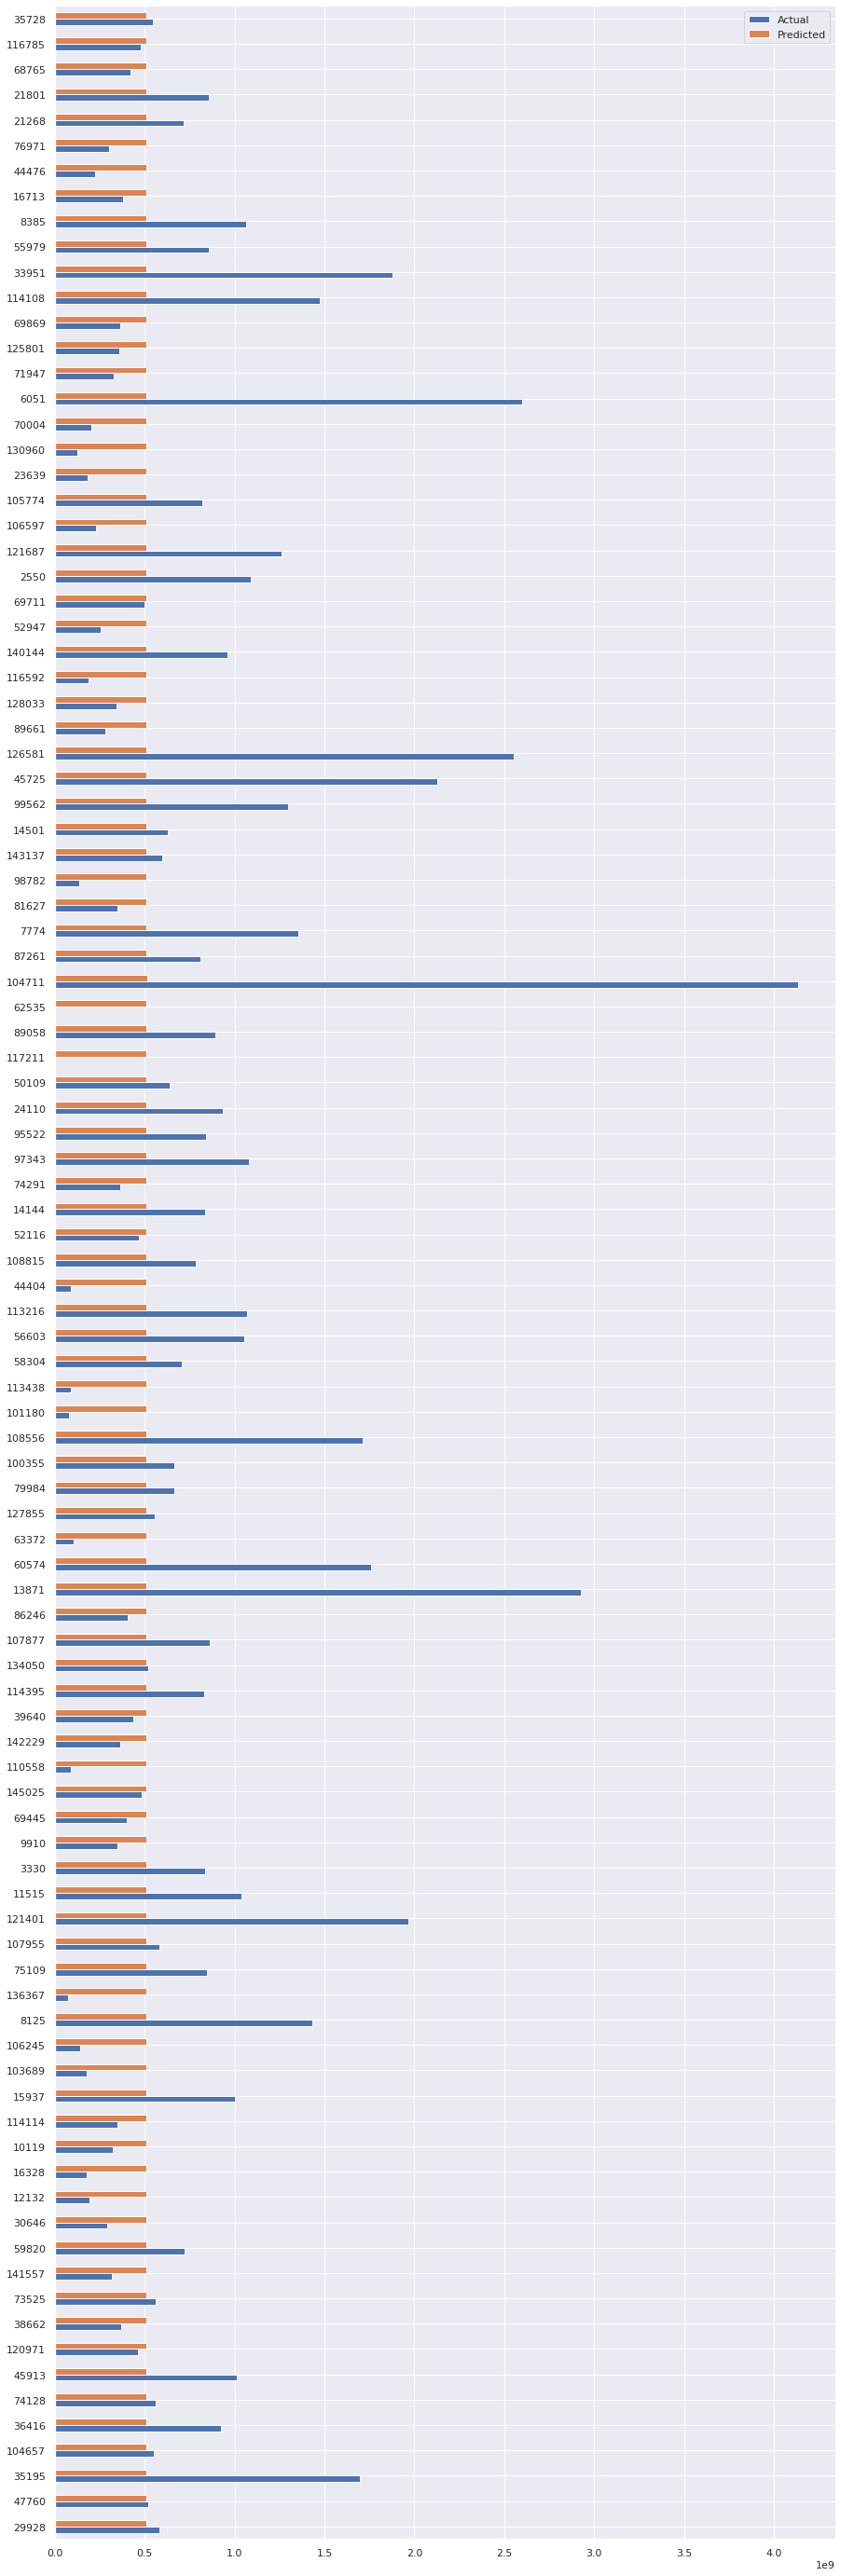

In [13]:
y_predicted = random_search.predict(X_test)
df_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})
df_predicted.sample(100).plot(kind='barh',figsize=(15,50))
plt.show()